In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [3]:
from os import getcwd, chdir
# Change Path from skillshed2023_HybridClustering to Raw folder, going back 2 folders
chdir("../../") ## and the pointer is at PATHRISE (The parent folder)

In [4]:
# Get Path to Data
# getcwd: point to the current location where the pointer is at
data_path = getcwd() + "/data/raw"

# Read the DataFrame
df = pd.read_csv(f"{data_path}/CoalMiningCluster1.csv")

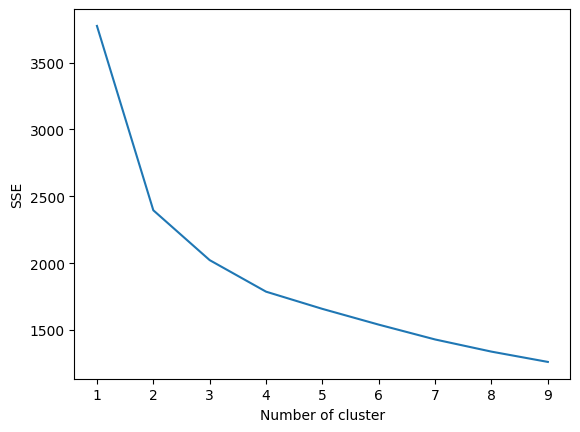

In [5]:
# Elbow Criterion

from warnings import filterwarnings

filterwarnings('ignore')

#Features are everything except SOC_Code
data = df.drop(['OCC_CODE', 'Title'], axis=1)

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()